<a href="https://colab.research.google.com/github/AldairDominguez/AldairDominguez/blob/main/christmas_movies_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:red; overflow:hidden"><b>🎄 Christmas Movies ❄️</b></div>

<div style="text-align: center;">
    <img src="https://s.wsj.net/public/resources/images/BN-WA638_201711_NS_20171108093902.gif" alt="alzheimers" style="width:100%; height:auto; border-radius: 70px;">
</div>


<div style="padding: 20px; border-color: green; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid red;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em; ">
       
- En este ejercicio, procesaremos los datos, visualizaremos información relevante y haremos un modelo de machine learning para la información de peliculas de navidad 🎅🏻

- El set de datos puedes encontrarlo [aqui](https://www.kaggle.com/datasets/jonbown/christmas-movies)
</div>

<a id="libraries"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:green;overflow:hidden"><b>1.  Librerias 🎅🏻</b></div>

En todo proyecto de python, comenzamos cargando las librerias que queremos utilizar

In [ ]:
#! pip install plotly-express

In [ ]:
#import numpy as np # linear algebra
import pandas as pd # nos permite cargar datos como archivos de excel (formatos .xlsx y .csv)
import matplotlib.pyplot as plt # Nos permite realizar gráficos con python
import seaborn as sns # Otra herramienta para gráficos
import plotly_express as px # Otra herramienta para gráficos.

# Herramientas para modelos de ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer


<a id="data"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:green;overflow:hidden"><b>2. Leyendo y analizando los datos 🎅🏻</b></div>

Una vez cargadas las librerias/herramientas que utilizaremos, podemos proceder a leer los datos.

Estos datos se representan en lo que se denomina un **Dataset** o conjunto de datos. Cuando leemos un archivo .csv o .xlsx (formatos de Excel/googlesheets), un dataset es equivalente a una tabla con datos.

In [ ]:
df = pd.read_csv('sample_data/christmas_movies.csv')
df.sample(10)

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
465,A Dog for Christmas,Not Rated,89.0,4.9,NaN,Comedy,2015.0,Cute Holiday movie about a girl and her dog. B...,Chris Nickin,"Joel Paul Reisig, Dean Cain, Richard Karn, Dus...",769,NaN,https://m.media-amazon.com/images/M/MV5BZjQ3Yj...,Movie
203,Christmas on the Square,TV-PG,98.0,5.2,51.0,"Comedy, Family, Musical",2020.0,An embittered scrooge of a woman plans to sell...,Debbie Allen,"Dolly Parton, Jenifer Lewis, Josh Segarra, Jea...","3,031",NaN,https://m.media-amazon.com/images/M/MV5BYTkxZD...,Movie
494,Wrapped Up in Love,TV-G,89.0,5.4,NaN,"Comedy, Family, Romance",2021.0,"Ashley has always been the ""Christmas Queen"" i...",Michelle Ouellet,"Brittany Bristow, Olivier Renaud, Tara Joshi, ...",385,NaN,https://m.media-amazon.com/images/M/MV5BNDUwMT...,Movie
479,Saying Yes to Christmas,TV-PG,87.0,5.8,NaN,"Drama, Romance",2021.0,A magical Christmas wish makes a career-obsess...,Graeme Campbell,"Erika Prevost, Romaine Waite, Zoe Doyle, Sabri...",387,NaN,https://m.media-amazon.com/images/M/MV5BZGEwZm...,Movie
514,A Golden Christmas,TV-PG,95.0,5.5,NaN,"Comedy, Drama, Family",2009.0,A woman visits her parents for Christmas. Hear...,John Murlowski,"Andrea Roth, Nicholas Brendon, Elisa Donovan, ...","1,362",NaN,https://m.media-amazon.com/images/M/MV5BMTM2OT...,Movie
608,The Road Home for Christmas,TV-PG,84.0,6.8,NaN,"Drama, Romance",2019.0,"Lindsey and Wes, rival musicians who perform i...",Peter Sullivan,"Marla Sokoloff, Jacob Young, Marie Osmond, Rob...",768,NaN,https://m.media-amazon.com/images/M/MV5BMGZmMT...,Movie
17,A Christmas Carol,PG,96.0,6.8,55.0,"Animation, Adventure, Comedy",2009.0,An animated retelling of Charles Dickens' clas...,Robert Zemeckis,"Jim Carrey, Gary Oldman, Colin Firth, Steve Va...","126,638",$137.86M,https://m.media-amazon.com/images/M/MV5BMTM1MT...,Movie
303,My Christmas Family Tree,TV-G,84.0,7.6,NaN,"Drama, Romance",2021.0,When Vanessa receives the results from her Fam...,Jason Bourque,"Aimee Teegarden, Andrew W. Walker, James Tuppe...","2,399",NaN,https://m.media-amazon.com/images/M/MV5BMjUzY2...,Movie
496,"Love Always, Santa",TV-G,84.0,6.7,NaN,"Drama, Romance",2016.0,"A widow's daughter writes to Santa Claus, aski...",Brian Herzlinger,"Marguerite Moreau, Mike Faiola, Brady Smith, I...","1,784",NaN,https://m.media-amazon.com/images/M/MV5BNzc4ZW...,Movie
201,Christmas at Castle Hart,TV-G,84.0,6.2,NaN,"Comedy, Romance",2021.0,Brooke Bennett goes to Ireland for Christmas t...,Stefan Scaini,"Lacey Chabert, Stuart Townsend, Ali Hardiman, ...","1,959",NaN,https://m.media-amazon.com/images/M/MV5BODMzNm...,Movie


In [ ]:
df.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'meta_score', 'genre',
       'release_year', 'description', 'director', 'stars', 'votes', 'gross',
       'img_src', 'type'],
      dtype='object')

En este caso, leemos los datos y los guardamos en una *variable* llamada **df**. Desde aqui, podremos interactuar con ellos y analizarlos refiriendonos a este nombre. Cada fila de **df** corresponde la información de un pasajero. La información con la que contamos para cada uno es la siguiente:

- **title**: Nombre de la pelicula.
- **rating**: Clasificación (PG, PG-13, etc).
- **runtime**: Duración.
- **imdb_rating**: Rating en la pagina IMDB
- **meta_score**: Nota de la metacritica.
- **genre**: Uno o más generos de la pelicula.
- **release_year**: Año de lanzamiento.
- **description**: Sinopsis de la pelicula.
- **director**: Director.
- **stars**: Actores protagonistas/clave.
- **votes**: Número de votos en IMDB.
- **gross**: Ganancia.
- **img_src**: Link al poster de la pelicula.
- **type**: Tipo (todos son tipo pelicula)

Podemos analizar el estado inicial de nuestro **Dataset**:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         873 non-null    object 
 1   rating        660 non-null    object 
 2   runtime       832 non-null    float64
 3   imdb_rating   839 non-null    float64
 4   meta_score    100 non-null    float64
 5   genre         872 non-null    object 
 6   release_year  862 non-null    float64
 7   description   873 non-null    object 
 8   director      868 non-null    object 
 9   stars         862 non-null    object 
 10  votes         839 non-null    object 
 11  gross         79 non-null     object 
 12  img_src       873 non-null    object 
 13  type          873 non-null    object 
dtypes: float64(4), object(10)
memory usage: 95.6+ KB


Podemos visualizar que:

- Contamos con 873 peliculas.
- NO tenemos información completa para el rating, meta_score, runtime, gross, entre otras.

<a id="prep"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:green;overflow:hidden"><b>3. Data Pre-processing 🎅🏻</b></div>

Queremos analizar el rating_imdb de las peliculas dado algunso factores como el genero.

Una complejidad de ello es que estan todos juntos en una sola columna/variable como palabras y hay varios que poseen multiples generos. Para poder analizarlos, debemos crear, para cada genero, una columna que tendrá valores 0/1 indicando si la pelicula pertenece a dicho genero (1) o no (0).

In [ ]:
df = df.drop(['description','meta_score','gross', 'img_src'], axis=1)
df

,title,rating,runtime,imdb_rating,genre,release_year,director,stars,votes,type
0,Love Actually,R,135.0,7.6,"Comedy, Drama, Romance",2003.0,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","517,283",Movie
1,Home Alone,PG,103.0,7.7,"Comedy, Family",1990.0,Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...","629,713",Movie
2,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,Comedy,1989.0,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","213,196",Movie
3,Elf,PG,97.0,7.1,"Adventure, Comedy, Family",2003.0,Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...","300,546",Movie
4,How the Grinch Stole Christmas,PG,104.0,6.3,"Comedy, Family, Fantasy",2000.0,Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...","280,898",Movie
...,...,...,...,...,...,...,...,...,...,...
868,CBS News Sunday Morning with Jane Pauley: Epis...,TV-G,NaN,NaN,"News, Talk-Show",1979.0,Kate D'Arcy-Coleman,"Jane Pauley, Serena Altschul, Nicholas Britell...",NaN,TV Episode
869,Honest Ads: If Holiday Movies Were Honest,NaN,NaN,NaN,"Short, Comedy",2012.0,Michael Strauss,"Jack Hunter, Britt Migs, Michael Strauss,",NaN,TV Episode
870,Cosmic Cowboys: Céréal Christmas,NaN,NaN,NaN,Animation,2004.0,NaN,NaN,NaN,TV Episode
871,Proper Manors: Christmas Special: Christmas Pa...,NaN,20.0,NaN,"Action, Comedy, Crime",2012.0,Dallin Boyce,"Brandyn Cross, Peter D'Alessio, Janis Race-Big...",NaN,TV Episode


In [ ]:
def vectorize_column(df, col_name, sep=', ', min_df=20):
    ll = df[col_name].fillna('none').str.split(sep).to_list()
    ll = [[j.rstrip(', ').strip(' ').replace('.', '_').replace('\'', '_').replace(' ', '_').replace('.', '_').replace('&', '_').replace('-', '_') for j in i] for i in ll]
    ll1 = []
    for item in ll:
        if item != ['none']:
            ttt = ' '.join(item)
        else:
            ttt = 'none'
        ll1.append(ttt)
    vectorizer = CountVectorizer(min_df=min_df, lowercase=False)
    vectorizer.fit(ll1)
    voc = vectorizer.vocabulary_
    voc_inv = {v: col_name+'_'+k for k, v in voc.items()}
    vector = vectorizer.transform(ll1)
    tt = pd.DataFrame(vector.toarray())
    tt = tt.rename(columns=voc_inv)
    df = pd.concat([df,tt], axis=1).drop([col_name], axis=1)
    return df

df = vectorize_column(df, col_name='genre', sep=', ', min_df=6)


In [ ]:
df.head().T

,0,1,2,3,4
title,Love Actually,Home Alone,National Lampoon's Christmas Vacation,Elf,How the Grinch Stole Christmas
rating,R,PG,PG-13,PG,PG
runtime,135.0,103.0,97.0,97.0,104.0
imdb_rating,7.6,7.7,7.5,7.1,6.3
release_year,2003.0,1990.0,1989.0,2003.0,2000.0
director,Richard Curtis,Chris Columbus,Jeremiah S. Chechik,Jon Favreau,Ron Howard
stars,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","Macaulay Culkin, Joe Pesci, Daniel Stern, John...","Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","Will Ferrell, James Caan, Bob Newhart, Zooey D...","Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam..."
votes,"517,283","629,713","213,196","300,546","280,898"
type,Movie,Movie,Movie,Movie,Movie
genre_Action,0,0,0,0,0


In [ ]:
df.head()

,title,rating,runtime,imdb_rating,release_year,director,stars,votes,type,genre_Action,...,genre_Drama,genre_Family,genre_Fantasy,genre_Film_Noir,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Short
0,Love Actually,R,135.0,7.6,2003.0,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","517,283",Movie,0,...,1,0,0,0,0,0,0,0,1,0
1,Home Alone,PG,103.0,7.7,1990.0,Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...","629,713",Movie,0,...,0,1,0,0,0,0,0,0,0,0
2,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,1989.0,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","213,196",Movie,0,...,0,0,0,0,0,0,0,0,0,0
3,Elf,PG,97.0,7.1,2003.0,Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...","300,546",Movie,0,...,0,1,0,0,0,0,0,0,0,0
4,How the Grinch Stole Christmas,PG,104.0,6.3,2000.0,Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...","280,898",Movie,0,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['title', 'rating', 'runtime', 'imdb_rating', 'release_year', 'director',
       'stars', 'votes', 'type', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_Film_Noir', 'genre_Horror',
       'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_Romance',
       'genre_Short'],
      dtype='object')

In [ ]:
genre_columns = ['genre_Action', 'genre_Adventure', 'genre_Animation',
                 'genre_Comedy', 'genre_Crime', 'genre_Drama', 'genre_Family',
                 'genre_Fantasy', 'genre_Film_Noir', 'genre_Horror', 'genre_Music',
                 'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Short']

<a id="visualization"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:green;overflow:hidden"><b>4. Pequeño analisis y visualización🎅🏻</b></div>

Podemos analizar como afecta la clasificación al rating de imdb:

In [ ]:
df_clasificacion = df.groupby('rating')['imdb_rating'].mean().sort_values(ascending = False).reset_index()
df_clasificacion

,rating,imdb_rating
0,TV-MA,7.140000
1,Passed,7.077778
2,Approved,6.835000
3,PG-13,6.354167
4,TV-G,6.318008
5,R,6.300000
6,G,6.220690
7,TV-14,6.181250
8,TV-PG,5.936641
9,Not Rated,5.920755


podemos visualizar esta tabla mediante un gráfico de barras:

In [ ]:
fig = px.bar(df_clasificacion, x='rating', y='imdb_rating')
fig.show()


Si queremos analizar el rating promedio por genero, debemos utilizar cada columna que generamos, filtrar por aquellas peliculas que tienen valor "1" en el genero que deseamos analizar y solo para ellos, realizar el ejercicio anterior.

Tomemos de ejemplo el genero de *accion*:

In [ ]:
df_accion = df[df['genre_Action'] == 1]
promedio = df_accion['imdb_rating'].mean()

print(f'El rating promedio del genero Accion es: {round(promedio,2)}')

El rating promedio del genero Accion es: 6.69


Podriamos comparar, mediante la técnica de *agrupación* la comparación entre el genero *acción* versus todo el resto:

In [ ]:
df.groupby(['genre_Action'])['imdb_rating'].mean().reset_index()

,genre_Action,imdb_rating
0,0,6.095553
1,1,6.685714


Notamos que al comparar el genero de Acción versus todo el resto, este tipo de peliculas tienen mejor rating promedio, pero ¿será eso verdad al revisar el promedio separado por genero?.

Revisaremos mediante una herramienta llamada *ciclos* todos los generos, sin tener que escribir manualmente el codigo para cada uno:

In [ ]:
genero = []
rating_promedio = []

for genre in genre_columns:
  df_info = df[df[genre] == 1]
  mean_value = df_info['imdb_rating'].mean()

  genero.append(genre.split('_')[1])
  rating_promedio.append(mean_value)


df_rating_promedio = pd.DataFrame(
    {
        'genero': genero,
        'imdb_promedio': rating_promedio
    }
)

df_rating_promedio.head()

,genero,imdb_promedio
0,Action,6.685714
1,Adventure,6.220000
2,Animation,6.522727
3,Comedy,6.013693
4,Crime,6.234783


Con esto, podemos gráficar el rating promedio por genero:

In [ ]:
#df_rating_promedio.plot(kind = 'bar', x = 'genero', y = 'imbd_promedio')

fig = px.bar(df_rating_promedio, x='genero', y='imdb_promedio')
fig.show()


¿Podriamos utilizar esta misma estructura de codigo para determinar la cantidad de peliculas de navidad que hay de cada genero?. La respuesta es si!.

Cambiando solo un par de detalles en nuestro codigo, podemos calcular el número de peliculas por genero:

In [ ]:
genero = []
total_peliculas = []

for genre in genre_columns:
  df_info = df[df[genre] == 1]
  count_value = df_info['imdb_rating'].count()

  genero.append(genre.split('_')[1])
  total_peliculas.append(count_value)


df_rating_promedio = pd.DataFrame(
    {
        'genero': genero,
        'total_peliculas': total_peliculas
    }
)

df_rating_promedio.head()

,genero,total_peliculas
0,Action,7
1,Adventure,45
2,Animation,44
3,Comedy,482
4,Crime,23


In [ ]:
fig = px.bar(df_rating_promedio, x='genero', y='total_peliculas')
fig.show()


<a id="visualization"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:green;overflow:hidden"><b>4. Modelo Predictivo🎅🏻</b></div>

¿Será posible predecir el rating de una pelicula sabiendo a que generos pertenece?

Utilizaremos el modelo de machine learning llamado *Arbol de decisión* para ello:

In [ ]:
X = df[genre_columns]
X.fillna(0, inplace = True)
y = df['imdb_rating']
y = y.fillna(0)

<ipython-input-32-9a25be701376>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Film_Noir,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Short
0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
869,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
870,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
871,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,imdb_rating
0,7.6
1,7.7
2,7.5
3,7.1
4,6.3
...,...
868,0.0
869,0.0
870,0.0
871,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
dt = DecisionTreeRegressor(max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
predicciones = dt.predict(X_test)

In [ ]:
comparativa = pd.DataFrame(data = {
    'prediccion': predicciones,
    'real': y_test
})

comparativa['prediccion'] = comparativa['prediccion'].apply(lambda x: round(x,1))

In [ ]:
comparativa

,prediccion,real
795,5.8,4.2
319,6.3,6.6
382,6.3,6.6
737,6.0,5.6
422,6.0,5.6
...,...,...
569,6.0,5.9
104,5.8,6.7
114,5.9,6.1
351,6.3,6.8


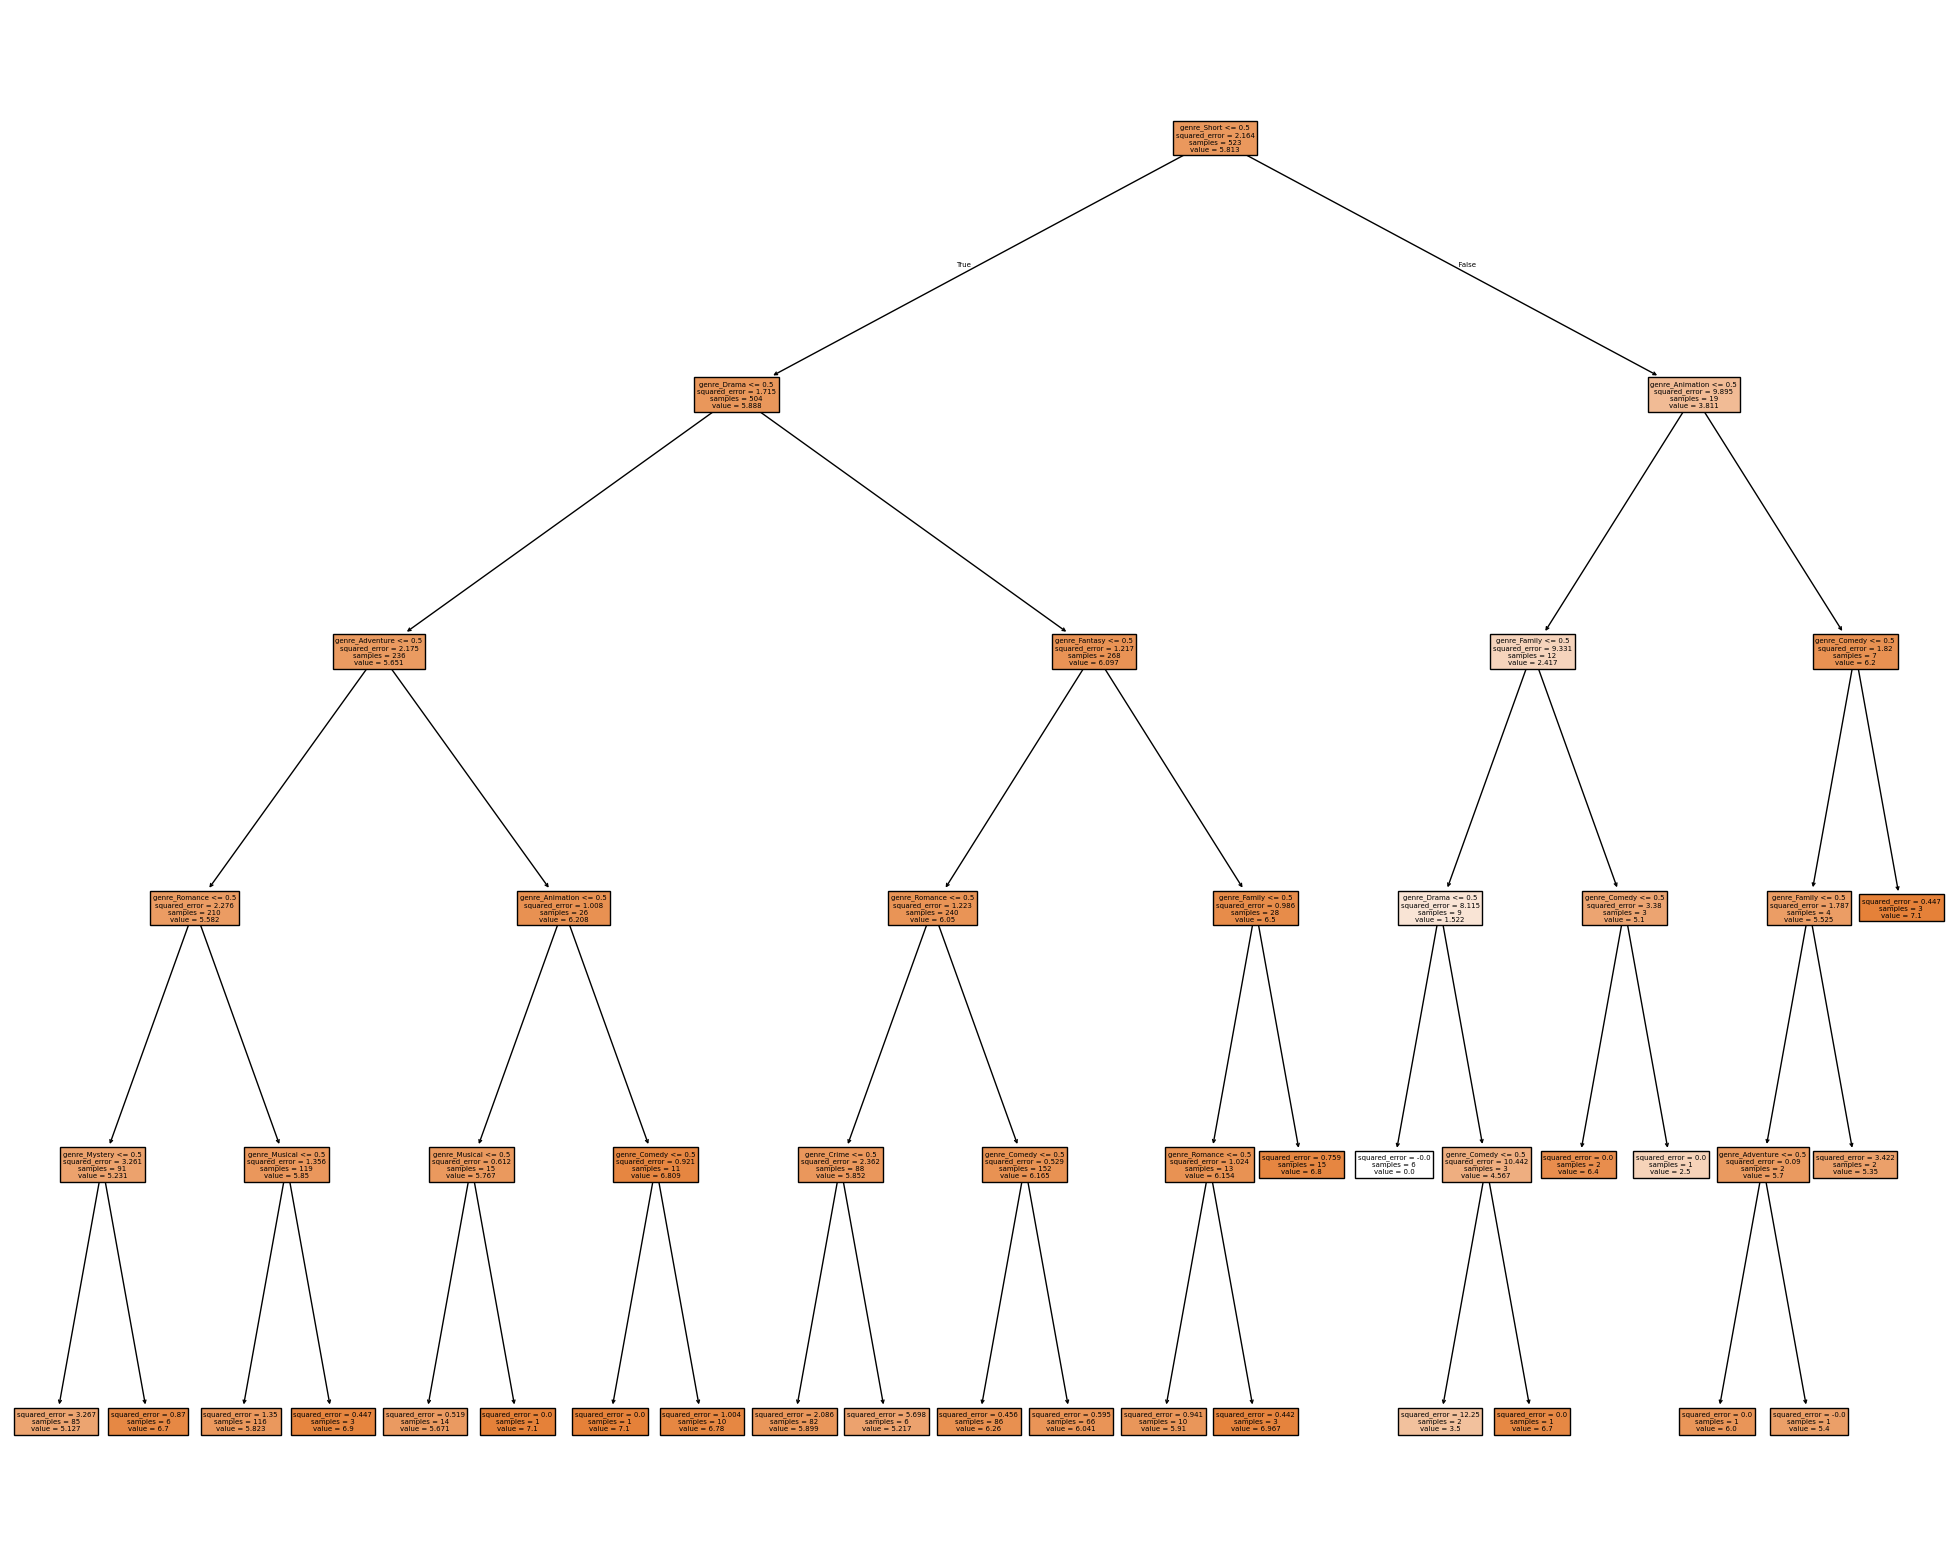

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=genre_columns,
                   filled=True)

Para cuantificar el error de nuestro modelo, podemos usar el error cuadratico medio, el cual esta dado por la siguiente formula:

$$ \frac{1}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_{\text{real}_i})^2$$

En donde, calculamos la diferencia entre el valor real y predicho, elevamos dicha diferencia al cuadrado, sumamos todos los valores obtenidos y calculamos el promedio.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicciones)

2.28305725413374